In [3]:
#Model Training
#1.1 Import Data and Required Packages
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [8]:
df = pd.read_csv('data/stud.csv')

In [9]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
X = df.drop(columns=['math_score'])

In [12]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [13]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      <StringArray>
['female', 'male']
Length: 2, dtype: str
Categories in 'race_ethnicity' variable:   <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
Categories in'parental level of education' variable: <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categories in 'lunch' variable:      <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categories in 'test preparation course' variable:      <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [14]:
y = df['math_score']

In [15]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [26]:
df = pd.read_csv("data/stud.csv", dtype=str)



In [31]:
# Step 1: Start with original DataFrame
X = df.drop(columns=['math_score'])

# Step 2: Identify numeric and categorical features BEFORE transformation
num_features = X.select_dtypes(exclude=["object", "string"]).columns
cat_features = X.select_dtypes(include=["object", "string"]).columns

# Step 3: Define transformers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

# Step 4: Apply transformation
X = preprocessor.fit_transform(X)


In [19]:
X.shape

(1000, 19)

In [32]:
#separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 166), (200, 166))

In [33]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [34]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.8946
- Mean Absolute Error: 3.8474
- R2 Score: 0.8937
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.3390
- Mean Absolute Error: 5.8710
- R2 Score: 0.6416


Lasso
Model performance for Training set
- Root Mean Squared Error: 13.8688
- Mean Absolute Error: 11.1349
- R2 Score: 0.1468
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 14.9207
- Mean Absolute Error: 11.7251
- R2 Score: 0.0851


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.1900
- Mean Absolute Error: 4.1101
- R2 Score: 0.8805
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9.0496
- Mean Absolute Error: 5.8631
- R2 Score: 0.6635


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 9.6463
- Mean Absolute Error: 7.5110
- R2 Score: 0.5873
-------------------

In [35]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.663452
0,Linear Regression,0.641585
7,CatBoosting Regressor,0.559186
6,XGBRegressor,0.555127
5,Random Forest Regressor,0.442184
4,Decision Tree,0.199448
3,K-Neighbors Regressor,0.172838
8,AdaBoost Regressor,0.140951
1,Lasso,0.085118


In [36]:
#Linear Regression
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 64.16


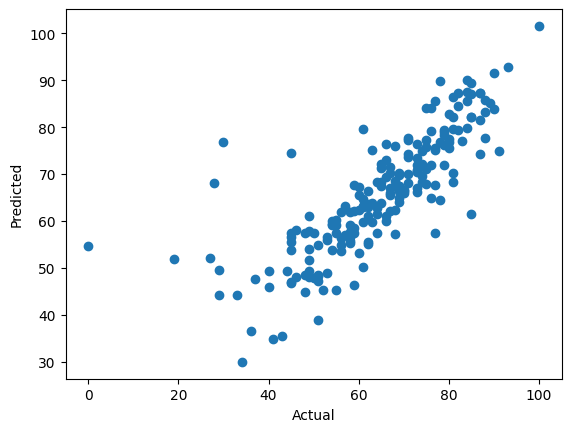

In [37]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

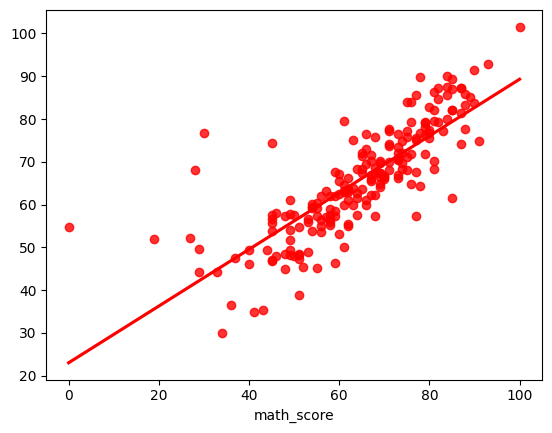

In [38]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [39]:
#Difference between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,74.821666,16.178334
737,53,55.918278,-2.918278
740,80,77.443173,2.556827
660,74,74.852961,-0.852961
411,84,85.509853,-1.509853
...,...,...,...
408,52,45.412650,6.587350
332,62,63.412165,-1.412165
208,74,68.367337,5.632663
613,65,67.418567,-2.418567
